# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:
df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Высшее', 'Среднее', 'Среднее специальное', 'Два и более высших образования', 'Ученая степень', 'Неполное среднее', 'Неоконченное высшее'}


MARITAL_STATUS
{'Не состоял в браке', 'Состою в браке', 'Вдовец/Вдова', 'Гражданский брак', 'Разведен(а)'}


GEN_INDUSTRY
{nan, 'Управляющая компания', 'Металлургия/Промышленность/Машиностроение', 'Сборочные производства', 'Салоны красоты и здоровья', 'Информационные технологии', 'Туризм', 'ЧОП/Детективная д-ть', 'Развлечения/Искусство', 'Государственная служба', 'Юридические услуги/нотариальные услуги', 'Недвижимость', 'Торговля', 'Энергетика', 'Нефтегазовая промышленность', 'Логистика', 'Страхование', 'Информационные услуги', 'Химия/Парфюмерия/Фармацевтика', 'СМИ/Реклама/PR-агенства', 'Коммунальное хоз-во/Дорожные службы', 'Ресторанный бизнес/Общественное питание', 'Сельское хозяйство', 'Подбор персонала', 'Другие сферы', 'Транспорт', 'Наука', 'Здравоохранение', 'Образование', 'Строительство', 'Маркетинг', 'Банк/Финансы'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [14]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [15]:
for i in df_train.columns: # перебираем все столбцы
    if (df_train[i].isnull().sum() > 0):
        print('='*10)
        print(i) # выводим название столбца
        print(df_train[i].isnull().sum()) # выводим количество незаполненных строк
        print(str(df_train[i].dtype))
        print('\n') # выводим пустую строку
        
#Существует множество возможных вариантов:
# 1. удалить эти строки, но есть вероятность потерять важные данные
# 2. заполнить нулями, в случае типа float или 'Не заполнено' в случае типа object
# 3. заполнить наиболее встречающимися значениями (если тип - object)
# 4. заполнить средним значением/ мединой/ модой (если тип - float)

GEN_INDUSTRY
1367
object


GEN_TITLE
1367
object


ORG_TP_STATE
1367
object


ORG_TP_FCAPITAL
1365
object


JOB_DIR
1367
object


TP_PROVINCE
295
object


REGION_NM
1
object


WORK_TIME
1368
float64


PREVIOUS_CARD_NUM_UTILIZED
14935
float64




#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [16]:
a = max(df.count()) # количество строк

for i in df_train.columns: # перебираем все столбцы
    if  len(set(df_train[i]))/a < 0.005 and ('object' in str(df_train[i].dtype)):
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все уникальные значения
        print(len(set(df_train[i]))/a)
        print('\n') # выводим пустую строку
        
# Необходимо закодировать столбцы с категориальными признаками

EDUCATION
{'Высшее', 'Среднее', 'Среднее специальное', 'Два и более высших образования', 'Ученая степень', 'Неполное среднее', 'Неоконченное высшее'}
0.00023230345468423325


MARITAL_STATUS
{'Не состоял в браке', 'Состою в браке', 'Вдовец/Вдова', 'Гражданский брак', 'Разведен(а)'}
0.0001659310390601666


GEN_INDUSTRY
{nan, 'Управляющая компания', 'Металлургия/Промышленность/Машиностроение', 'Сборочные производства', 'Салоны красоты и здоровья', 'Информационные технологии', 'Туризм', 'ЧОП/Детективная д-ть', 'Развлечения/Искусство', 'Государственная служба', 'Юридические услуги/нотариальные услуги', 'Недвижимость', 'Торговля', 'Энергетика', 'Нефтегазовая промышленность', 'Логистика', 'Страхование', 'Информационные услуги', 'Химия/Парфюмерия/Фармацевтика', 'СМИ/Реклама/PR-агенства', 'Коммунальное хоз-во/Дорожные службы', 'Ресторанный бизнес/Общественное питание', 'Сельское хозяйство', 'Подбор персонала', 'Другие сферы', 'Транспорт', 'Наука', 'Здравоохранение', 'Образование', 'Строительств

sample
{'train'}
3.318620781203332e-05




#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [17]:
def preproc_data(df_input):
    df_output = df_input.copy()
    import numpy as np
    # Удаляем идентификатор AGREEMENT_RK
    if 'AGREEMENT_RK' in df_output.columns:
        df_output = df_output.drop(['AGREEMENT_RK'], axis=1)
    
    # Избавляемся от проблем с '.' и ','
    f = lambda x: x.replace(',', '.')
    listOfColsToReplace = ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']
    for columns in listOfColsToReplace:
        df_output[columns] = df_output[columns].apply(f)     
    
    # Заполняем объекты с пропусками  
    listOfCols = ['GEN_INDUSTRY','GEN_TITLE','ORG_TP_STATE','ORG_TP_FCAPITAL','JOB_DIR','TP_PROVINCE','REGION_NM']
    for col in listOfCols:
        m = df_output[col].mode().values[0]
        df_output[col] = df_output[col].fillna(m, inplace=True)
        
    listOfCols=['WORK_TIME','PREVIOUS_CARD_NUM_UTILIZED']
    for col in listOfCols:
        a = df_output[col]
        m = np.mean(a)
        a.fillna(m, inplace=True) 
        
    # Кодируем категориальные признаки
    df_output = pd.get_dummies(df_output, columns=['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE','ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM'])
    
    return df_output

In [18]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [19]:
X = df_train_preproc.iloc[:,1:].values
X_test = df_test_preproc.iloc[:,1:].values

Y = df_train_preproc.loc[:, 'TARGET'].values
Y_test = df_test_preproc.loc[:, 'TARGET'].values

#### Задание 5. Обучение и оценка качества разных моделей

In [20]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42 
#train test split is a library to split Split data into train and test samples
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier( max_depth = 5)
clf.fit(X_train, Y_train)
y_predict = clf.predict(X_test)
y_predict_proba = clf.predict_proba(X_test)


# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(Y_test, y_predict))
print(precision_score(Y_test, y_predict))
print(recall_score(Y_test, y_predict))

0.8767243266914824
0.21428571428571427
0.005405405405405406


In [22]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(random_state=42, max_depth=9)
forest.fit(X_train, Y_train)
y_hat = forest.predict(X_test)
y_hat_proba = forest.predict_proba(X_test)


# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(Y_test, y_hat))
print(precision_score(Y_test, y_hat))
print(recall_score(Y_test, y_hat))

0.8784760236479089
0.5
0.0018018018018018018


In [23]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.linear_model import LogisticRegression

logregression = LogisticRegression(C=1.0, fit_intercept=True, penalty='l2')
logregression.fit(X_train, Y_train)
y_hat_log = logregression.predict(X_test)
y_hat_proba__log = logregression.predict_proba(X_test)


# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(Y_test, y_hat_log))
print(precision_score(Y_test, y_hat_log))
print(recall_score(Y_test, y_hat_log))

0.877819137289249
0.2857142857142857
0.0036036036036036037


(-0.01, 1.01)

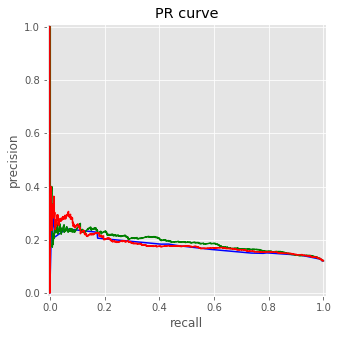

In [24]:
# Визуализировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, auc

precision, recall, thresholds = precision_recall_curve(Y_test, y_predict_proba[:,1])
precision_f, recall_f, thresholds_f = precision_recall_curve(Y_test, y_hat_proba[:,1])
precision_log, recall_log, thresholds_log = precision_recall_curve(Y_test, y_hat_proba__log[:,1])

plt.figure(figsize=(5, 5))
plt.plot(recall, precision,'b')
plt.plot(recall_f, precision_f,'g')
plt.plot(recall_log, precision_log, 'r')
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid(True)
plt.title('PR curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

(-0.01, 1.01)

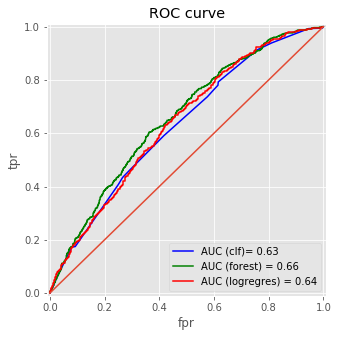

In [25]:
# Потроить roc-кривые всех моделей на одном графике
# Вывести roc_auc каждой моделе

fpr, tpr, thresholds = roc_curve(Y_test, y_predict_proba[:,1])
roc_auc = auc(fpr, tpr)

fpr_f, tpr_f, thresholds_f = roc_curve(Y_test, y_hat_proba[:,1])
roc_auc_f = auc(fpr_f, tpr_f)

fpr_log, tpr_log, thresholds_log = roc_curve(Y_test, y_hat_proba__log[:,1])
roc_auc_log = auc(fpr_log, tpr_log)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr,'b', label='AUC (clf)= %0.2f'% roc_auc)
plt.plot(fpr_f, tpr_f,'g',label='AUC (forest) = %0.2f'% roc_auc_f)
plt.plot(fpr_log, tpr_log,'r',label='AUC (logregres) = %0.2f'% roc_auc_log)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [26]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

for train_idx, test_idx in cv.split(X, Y):
    print('=== Очередной фолд ===')
    print('Обучение - {} объектов, валидация - {} объектов'.format(train_idx.shape[0], test_idx.shape[0]))
    print('Доля откликов: обучение - {}, валидация - {}'.format(Y[train_idx].mean(), Y[test_idx].mean()))
    print('\n')
    
scores = cross_val_score(
    forest,
    X,
    Y,
    scoring='roc_auc',
    cv=10
)
scores
scores.mean()

=== Очередной фолд ===
Обучение - 13699 объектов, валидация - 1524 объектов
Доля откликов: обучение - 0.11898678735674137, валидация - 0.1194225721784777


=== Очередной фолд ===
Обучение - 13700 объектов, валидация - 1523 объектов
Доля откликов: обучение - 0.11897810218978103, валидация - 0.11950098489822718


=== Очередной фолд ===
Обучение - 13701 объектов, валидация - 1522 объектов
Доля откликов: обучение - 0.11904240566382016, валидация - 0.11892247043363995


=== Очередной фолд ===
Обучение - 13701 объектов, валидация - 1522 объектов
Доля откликов: обучение - 0.11904240566382016, валидация - 0.11892247043363995


=== Очередной фолд ===
Обучение - 13701 объектов, валидация - 1522 объектов
Доля откликов: обучение - 0.11904240566382016, валидация - 0.11892247043363995


=== Очередной фолд ===
Обучение - 13701 объектов, валидация - 1522 объектов
Доля откликов: обучение - 0.11904240566382016, валидация - 0.11892247043363995


=== Очередной фолд ===
Обучение - 13701 объектов, валидация

0.6416425623731189

In [27]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки
forest = RandomForestClassifier(random_state=42, max_depth=9)
forest.fit(X_train, Y_train)
y_hat = forest.predict(X_test)
y_hat_proba = forest.predict_proba(X_test)
y_hat_proba

array([[0.88773051, 0.11226949],
       [0.73472333, 0.26527667],
       [0.8643268 , 0.1356732 ],
       ...,
       [0.90459935, 0.09540065],
       [0.86452952, 0.13547048],
       [0.91795393, 0.08204607]])

In [28]:
# Померить roc_auc на тесте

y_hat_proba = forest.predict_proba(X_test)[:,1]
roc_auc_score(Y_test,y_hat_proba)

0.6562205276063702